<a href="https://colab.research.google.com/github/f2024065214-ops/projects-for-ML-supervised-learning-part1-/blob/main/Copy_of_Untitled15_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


housing = fetch_california_housing(as_frame=True)
df = housing.frame

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print("X shape:", X.shape)
print("y shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

print("First 5 predictions:", y_pred[:5])


X shape: (20640, 8)
y shape: (20640,)
First 5 predictions: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

housing = fetch_california_housing(as_frame=True)
df = housing.frame

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)),
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

param_grid = {
    "poly__degree": [1, 2, 3]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1
)


grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-val R²:", grid.best_score_)

y_pred = grid.predict(X_test)
from sklearn.metrics import r2_score
print("Test R²:", r2_score(y_test, y_pred))


Best parameters: {'poly__degree': 1}
Best cross-val R²: 0.6110921251096776
Test R²: 0.575787706032451


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

housing = fetch_california_housing(as_frame=True)
df = housing.frame

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


lin_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

lin_pipeline.fit(X_train, y_train)
y_pred_lin = lin_pipeline.predict(X_test)

print("Linear Regression Performance:")
print("R²:", r2_score(y_test, y_pred_lin))
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("-" * 50)

rf = RandomForestRegressor(random_state=42)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5]
}

grid = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best RandomForest Params:", grid.best_params_)
print("Best Cross-val R²:", grid.best_score_)

y_pred_rf = grid.predict(X_test)

print("Random Forest Performance:")
print("Test R²:", r2_score(y_test, y_pred_rf))
print("Test MSE:", mean_squared_error(y_test, y_pred_rf))


Linear Regression Performance:
R²: 0.575787706032451
MSE: 0.5558915986952442
--------------------------------------------------
Best RandomForest Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-val R²: 0.8013884636036114
Random Forest Performance:
Test R²: 0.8061857564039718
Test MSE: 0.2539759249192041


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer

df= pd.read_csv(/content/maham-farooq)
df.head()

x= df.drop(columns= ['selling_price'],axis=1)
y= df['selling_price']
print(x.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
numeric_features = x.select_dtypes(include=["int64", "float64"]).columns
categorical_features = x.select_dtypes(include=["object"]).columns

ni= Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer(
    transformers=[
        ("scaler",ni,numeric_features),
        ("cat",categorical_transformer,categorical_features)

    ],
    remainder="drop"
)

pipeline = Pipeline([
    ("preprocessor",preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])
pipeline.fit(X_train, y_train)
y_pred_lin = pipeline.predict(X_test)
print(y_pred_lin)
param_grid = {
    "model__n_estimators": [100,200],
    "model__max_depth": [10,20,None],
    "model__min_samples_split": [2,5]
}
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1
)
grid.fit(X_train, y_train)
print("Best RandomForest Params:", grid.best_params_)
print("Best Cross-val R²:", grid.best_score_)
y_pred_rf = grid.predict(X_test)
print("random Regression Performance:")
print("R²:", r2_score(y_test, y_pred_lin))
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("-" * 50)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted - Random Forest")
plt.show()

residuals = y_test - y_pred_rf
plt.figure(figsize=(6,4))
plt.scatter(y_pred_rf, residuals, alpha=0.6, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Selling Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(x['km_driven'], y, alpha=0.6, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Selling Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

SyntaxError: invalid syntax (ipython-input-1485293267.py, line 12)

Dataset shape: (569, 30)
Classes: [0 1]

Best Logistic Regression Params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Best CV Accuracy: 0.9802197802197803
Logistic Regression Test Accuracy: 0.9736842105263158

Best SVM Params: {'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}
Best CV Accuracy: 0.9780219780219781
SVM Test Accuracy: 0.9824561403508771

Best RandomForest Params: {'clf__max_depth': 10, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
Best CV Accuracy: 0.9604395604395606
Random Forest Test Accuracy: 0.956140350877193

Model Comparison on Test Set:
Logistic Regression:  0.973684
SVM:  0.982456
Random Forest:  0.956140

Best model is: SVM

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted

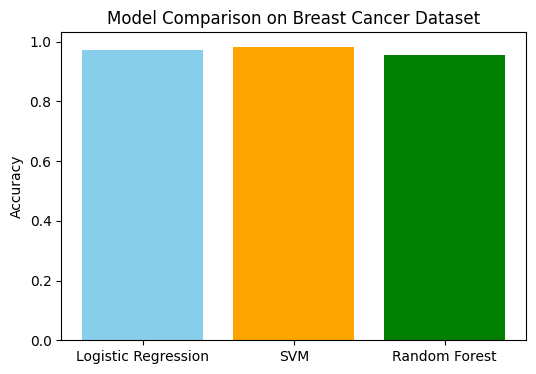


First 20 Predictions (Actual vs Predicted):

     Actual  Predicted
256       0          0
428       1          1
501       0          0
363       1          1
564       0          0
464       1          1
358       1          1
343       0          0
516       0          0
567       0          0
292       1          1
199       0          0
527       1          1
121       0          0
353       0          0
495       1          1
541       1          0
537       1          1
308       1          1
242       1          1
Prediction: Benign (Non-Cancerous Tumor)
Confidence: 0.9999945868088062


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer(as_frame= True)
df= data.frame
X = df.drop(columns=['target'])
y = data.target

print("Dataset shape:", X.shape)
print("Classes:", np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

log_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, random_state=42))
])

log_param_grid = {
    "clf__C": [0.1, 1, 10],
    "clf__penalty": ["l2"],
    "clf__solver": ["lbfgs", "saga"]
}

log_grid = GridSearchCV(log_pipeline, log_param_grid, cv=5, scoring="accuracy", n_jobs=-1)
log_grid.fit(X_train, y_train)

print("\nBest Logistic Regression Params:", log_grid.best_params_)
print("Best CV Accuracy:", log_grid.best_score_)

y_pred_log = log_grid.predict(X_test)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_log))

svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(probability=True,random_state=42))
])

svm_param_grid = {
    "clf__C": [0.1, 1, 10],
    "clf__kernel": ["linear", "rbf"],
    "clf__gamma": ["scale", "auto"]
}

svm_grid = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, scoring="accuracy", n_jobs=-1)
svm_grid.fit(X_train, y_train)

print("\nBest SVM Params:", svm_grid.best_params_)
print("Best CV Accuracy:", svm_grid.best_score_)

y_pred_svm = svm_grid.predict(X_test)
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred_svm))

rf_pipeline = Pipeline([
    ("clf", RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    "clf__n_estimators": [100, 200],
    "clf__max_depth": [10, 20, None],
    "clf__min_samples_split": [2, 5]
}

rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring="accuracy", n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("\nBest RandomForest Params:", rf_grid.best_params_)
print("Best CV Accuracy:", rf_grid.best_score_)

y_pred_rf = rf_grid.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))

results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Random Forest": accuracy_score(y_test, y_pred_rf)
}

print("\nModel Comparison on Test Set:")
for model, acc in results.items():
    print(f"{model}: {acc: 4f}")

# -----------------------------
# Confusion Matrix for best model
# -----------------------------
best_model = max(results, key=results.get)
print(f"\nBest model is: {best_model}")

if best_model == "Logistic Regression":
    y_best = y_pred_log
elif best_model == "SVM":
    y_best = y_pred_svm
else:
    y_best = y_pred_rf

print("\nClassification Report:\n", classification_report(y_test, y_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_best))

plt.figure(figsize=(6,4))
plt.bar(results.keys(), results.values(), color=["skyblue","orange","green"])
plt.ylabel("Accuracy")
plt.title("Model Comparison on Breast Cancer Dataset")
plt.show()
comparison_df = pd.DataFrame({
    "Actual": y_test[:20],
    "Predicted": y_best[:20]
})
print("\nFirst 20 Predictions (Actual vs Predicted):\n")
print(comparison_df)

manual_data = np.array([[
    14.2, 20.5, 90.1, 600.2, 0.1,
    0.15, 0.2, 0.25, 0.1, 0.2,
    0.8, 1.5, 5.0, 50.0, 0.005,
    0.03, 0.04, 0.02, 0.02, 0.006,
    16.0, 25.0, 105.0, 800.0, 0.12,
    0.20, 0.25, 0.3, 0.15, 0.07
]])

# Predict using the best model
if best_model == "Logistic Regression":
    model = log_grid.best_estimator_
elif best_model == "SVM":
    model = svm_grid.best_estimator_
else:
    model = rf_grid.best_estimator_

pred = model.predict(manual_data)[0]

if pred == 0:
    print("Prediction: Malignant (Cancerous Tumor)")
else:
    print("Prediction: Benign (Non-Cancerous Tumor)")

if hasattr(model, "predict_proba"):
    prob = model.predict_proba(manual_data)[0]
    print("Confidence:", np.max(prob))


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object
0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

Best Logistic Regression Params: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Best CV Accuracy: 0.9820507013332126
Logistic Regression Test Accuracy: 0.9

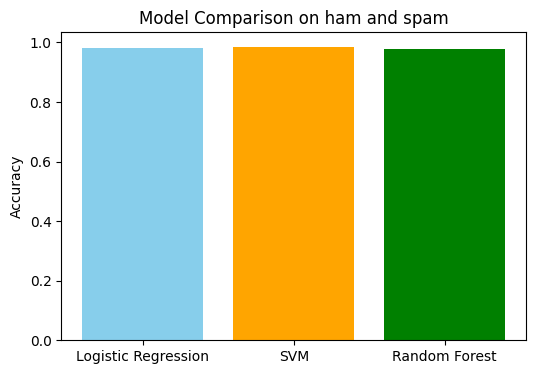


Test Message: Congratulations! You havenot won a $1000 Walmart gift card. Claim now!
Prediction: spam
Probabilities: [0.01365285 0.98634715]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

df= pd.read_csv("/content/sample_data/spam.csv",encoding="latin-1")

from sklearn.feature_extraction.text import TfidfVectorizer
df=df[['v1','v2']]
df.columns=['label','message']
df.head()
df['label']=df['label'].map({'ham':0,'spam':1})
df.head()

# Features (X) and target (y)
X = df['message']
y = df['label']
print(X)
print(y)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pip_log = Pipeline([
    ("vectorizer",TfidfVectorizer(stop_words='english', max_features=5000)),
    ("clf", LogisticRegression(max_iter=5000, random_state=42))
])
param_grid = {
    "clf__C": [0.1, 1, 10],
    "clf__penalty": ["l2"],
    "clf__solver": ["lbfgs", "saga"]
}
grid_log= GridSearchCV(pip_log, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_log.fit(X_train, y_train)
print("\nBest Logistic Regression Params:", grid_log.best_params_)
print("Best CV Accuracy:", grid_log.best_score_)
y_pred_log = grid_log.predict(X_test)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_log))

pip_svm = Pipeline([
    ("vectorizer",TfidfVectorizer(stop_words='english', max_features=5000)),
    ("clf",SVC(probability=True,random_state=42))
])
param_grid = {
    "clf__C": [0.1, 1, 10],
    "clf__kernel": ["linear","rbf"],
    "clf__gamma": ["scale", "auto"]
}
grid_svm= GridSearchCV(pip_svm, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_svm.fit(X_train, y_train)
print("\nBest Logistic Regression Params:", grid_svm.best_params_)
print("Best CV Accuracy:", grid_svm.best_score_)
y_pred_svm = grid_svm.predict(X_test)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_svm))


pip_tree = Pipeline([
    ("vectorizer",TfidfVectorizer(stop_words='english', max_features=5000)),
    ("clf", RandomForestClassifier(random_state=42))
])
param_grid = {
    "clf__n_estimators": [100,200],
    "clf__max_depth": [10,20,None],
    "clf__min_samples_split": [2,5]
}
grid_tree= GridSearchCV(pip_tree, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_tree.fit(X_train, y_train)
print("\nBest Logistic Regression Params:", grid_tree.best_params_)
print("Best CV Accuracy:", grid_tree.best_score_)
y_pred_tree = grid_tree.predict(X_test)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_tree))

results= {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Random Forest": accuracy_score(y_test, y_pred_tree)
}
print("\nModel Comparison on Test Set:")
for model, accuracy_score in results.items():
    print(f"{model}: {accuracy_score: 4f}")
best_model = max(results, key=results.get)
print(f"\nBest model is: {best_model}")

if best_model == "Logistic Regression":
    final = grid_log.best_estimator_
    y_best= y_pred_log
elif best_model == "SVM":
    final = grid_svm.best_estimator_
    y_best= y_pred_svm
else:
    final = grid_tree.best_estimator_
    y_best= y_pred_tree
best_model= final.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_best))
plt.figure(figsize=(6,4))
plt.bar(results.keys(), results.values(), color=["skyblue","orange","green"])
plt.ylabel("Accuracy")
plt.title("Model Comparison on ham and spam")
plt.show()

# ---------------- Predictive System ----------------
def predict_message(message):
    pred = final.predict([message])[0]
    prob = final.predict_proba([message])[0]
    label = "ham" if pred == 0 else "spam"
    return label, prob

# ---------------- Test Predictive System ----------------
test_msg = "Congratulations! You havenot won a $1000 Walmart gift card. Claim now!"
label, prob = predict_message(test_msg)
print("\nTest Message:", test_msg)
print("Prediction:", label)
print("Probabilities:", prob)



In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('/content/sample_data/UCI_Heart_Disease_Dataset_Combined.csv')

print("Dataset Shape:", df.shape)
print("Columns:", list(df.columns))

X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------- Logistic Regression ----------------
pipe_log = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, random_state=42))
])

param_log = {
    "clf__C": [0.1, 1, 10],
    "clf__solver": ["lbfgs", "liblinear", "saga"]
}

grid_log = GridSearchCV(pipe_log, param_log, cv=5, scoring="accuracy", n_jobs=-1)
grid_log.fit(X_train, y_train)
y_pred_log = grid_log.predict(X_test)

print("\n🔹 Logistic Regression")
print("Best Params:", grid_log.best_params_)
print("CV Accuracy:", grid_log.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_log))

# ---------------- SVM ----------------
pipe_svm = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("clf", SVC(probability=True, random_state=42))
])

param_svm = {
    "clf__C": [0.1, 1, 10],
    "clf__kernel": ["linear", "rbf"],
    "clf__gamma": ["scale", "auto"]
}

grid_svm = GridSearchCV(pipe_svm, param_svm, cv=5, scoring="accuracy", n_jobs=-1)
grid_svm.fit(X_train, y_train)
y_pred_svm = grid_svm.predict(X_test)

print("\n🔹 Support Vector Machine")
print("Best Params:", grid_svm.best_params_)
print("CV Accuracy:", grid_svm.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))

# ---------------- Random Forest ----------------
pipe_rf = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("clf", RandomForestClassifier(random_state=42))
])

param_rf = {
    "clf__n_estimators": [100, 200, 300],
    "clf__max_depth": [10, 20, None],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 4]
}

grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5, scoring="accuracy", n_jobs=-1)
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)

print("\n🔹 Random Forest")
print("Best Params:", grid_rf.best_params_)
print("CV Accuracy:", grid_rf.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))

# ---------------- Compare Models ----------------
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Random Forest": accuracy_score(y_test, y_pred_rf)
}

print("\n Model Comparison on Test Set:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

best_model_name = max(results, key=results.get)
print(f"\n Best Model is: {best_model_name}")

# ---------------- Final Predictive System ----------------
if best_model_name == "Logistic Regression":
    final_model = grid_log.best_estimator_
elif best_model_name == "SVM":
    final_model = grid_svm.best_estimator_
else:
    final_model = grid_rf.best_estimator_

# ---------------- Manual Prediction Example ----------------

sample_input = np.array([[40, 1, 1, 140, 289, 0, 0, 172, 0, 0]]).reshape(1,-1)

sample_input = sample_input.reshape(1, -1)
pred = final_model.predict(sample_input)

if pred[0] == 0:
    print("\nPrediction:  No Heart Disease")
else:
    print("\nPrediction:  Heart Disease")

# ---------------- Reports ----------------
print("\nClassification Report:\n", classification_report(y_test, final_model.predict(X_test)))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_model.predict(X_test)))


Dataset Shape: (2943, 11)
Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'HeartDisease']

🔹 Logistic Regression
Best Params: {'clf__C': 0.1, 'clf__solver': 'lbfgs'}
CV Accuracy: 0.7383331074671364
Test Accuracy: 0.7130730050933786

🔹 Support Vector Machine
Best Params: {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
CV Accuracy: 0.8007634277454037
Test Accuracy: 0.797962648556876

🔹 Random Forest
Best Params: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
CV Accuracy: 0.8755341735555857
Test Accuracy: 0.9032258064516129

 Model Comparison on Test Set:
Logistic Regression: 0.7131
SVM: 0.7980
Random Forest: 0.9032

 Best Model is: Random Forest

Prediction:  No Heart Disease

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       266
           1       0.89 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


# [`Doing a Project of predicting marks of math by Classification and Regression models`
 ]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#--------------------LINEAR_MODEL--------------------------#

df = pd.read_csv("/content/sample_data/StudentsPerformance.csv")

X = df.drop(columns=['math score','reading score','writing score'])
y = df['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

param_grid = [
    {
        'regressor': [LinearRegression()],
        'preprocessor__num__poly__degree': [1, 2, 3]
    },
    {
        'regressor': [RandomForestRegressor(random_state=42)],
        'preprocessor__num__poly__degree': [1, 2],
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [10, 20, None],
        'regressor__min_samples_split': [2, 5]
    }
]

grid = GridSearchCV(pipe, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

pred = grid.predict(X_test)

print("\nBest Parameters:", grid.best_params_)
print(" Best CV R²:", grid.best_score_)
print(" Test MSE:", mean_squared_error(y_test, pred))
print("Test R²:", r2_score(y_test, pred))
print(" Best Model Type:", type(grid.best_estimator_.named_steps['regressor']).__name__)

def manual_prediction():
    gender= input("\nenter gender: ")

    race= input("\nenter race: ")
    parental_level_of_education= input("\nenter parental level of education: ")
    lunch= input("\nenter lunch: ")
    test_preparation_course= input("\nenter test preparation course: ")
    reading_score= float(input("\nenter reading score: "))
    writing_score= float(input("\nenter writing score: "))
    math= input("enter math score:")

    data= pd.DataFrame({
        'gender': [gender],
        'race/ethnicity': [race],
        'parental level of education': [parental_level_of_education],
        'lunch': [lunch],
        'test preparation course': [test_preparation_course],
        'reading score': [reading_score],
        'writing score': [writing_score],
        'math score': [math]
    })
    pred=grid.predict(data)[0]
    print(pred)

manual_prediction()
ac = pd.DataFrame({
    "acyual":y_test[:5],
    "predicted":pred[:5]
})
print(ac)

#\n-------------------------Classification models---------------------------\n

df= pd.read_csv('/content/sample_data/StudentsPerformance.csv')
df['math_cat']= pd.cut(df['math score'],bins=[0,60,80,100],labels=["low","medium","high"])
df = df.dropna(subset=['math_cat'])

x= df.drop(columns=['math score','reading score','writing score'])
y= df['math_cat']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

numeric_features = x.select_dtypes(include=['int64','float64']).columns
categorical_features = x.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor= ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])
pip= Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])
param_grid = [{
    'clf': [LogisticRegression(max_iter=1000)],
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l2'],
    'clf__solver': ['liblinear', 'saga']
},
{  'clf': [RandomForestClassifier(random_state=42)],
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [10, 20, None],
    'clf__min_samples_split': [2,5]
}]
grid = GridSearchCV(pip, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
print("\nBest Params:", grid.best_params_)
print("CV Accuracy:", grid.best_score_)
y_pred = grid.predict(X_test)

y_test = y_test.astype(str)
y_pred = y_pred.astype(str)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(type(grid.best_estimator_.named_steps['clf']).__name__)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

def manual_prediction():
    gender= input("\nenter gender: ")
    race= input("\nenter race: ")
    parental_level_of_education= input("\nenter parental level of education: ")
    lunch= input("\nenter lunch: ")
    test_preparation_course= input("\nenter test preparation course: ")
    reading_score= float(input("\nenter reading score: "))
    writing_score= float(input("\nenter writing score: "))


    data = pd.DataFrame ({
        'gender': [gender],
        'race/ethnicity': [race],
        'parental level of education': [parental_level_of_education],
        'lunch': [lunch],
        'test preparation course': [test_preparation_course],
        'reading score': [reading_score],
        'writing score': [writing_score]
    })
    pred=grid.predict(data)[0]
    print("so math score: ",pred)

manual_prediction()



Best Parameters: {'preprocessor__num__poly__degree': 1, 'regressor': LinearRegression()}
 Best CV R²: 0.23921977289505492
 Test MSE: 200.51088395807753
Test R²: 0.17599982592933328
 Best Model Type: LinearRegression

enter gender: FEMALE

enter race: GROUP B

enter parental level of education: bachelor's degree

enter lunch: standard

enter test preparation course: none

enter reading score: 72

enter writing score: 72
enter math score:84
72.81587077911337
     acyual  predicted
521      91  65.344269
737      53  59.129273
740      80  75.993294
660      74  58.195987
411      84  84.069558

Best Params: {'clf': LogisticRegression(max_iter=1000), 'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
CV Accuracy: 0.5144025157232706
Test Accuracy: 0.545
LogisticRegression
Confusion Matrix:
 [[ 3  1 29]
 [ 0 31 35]
 [ 5 21 75]]

Classification Report:
               precision    recall  f1-score   support

        high       0.38      0.09      0.15        33
         low       0.

https://drive.google.com/file/d/1okg4cdoTkb3jqtNUbA_oZ9wRE8BIe8WG/view?usp=drive_link

# Predicted loan_status by loan prediction dataset by classification models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
df= pd.read_csv('/content/sample_data/train_u6lujuX_CVtuZ9i (1).csv')
X= df.drop(columns=['Loan_ID','Loan_Status'])
y= df['Loan_Status']

numeric_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
col_trans= ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline= Pipeline([
    ('preprocessor', col_trans),
    ('clf', LogisticRegression(max_iter= 5000))
])
param_grid = [
    {
        'clf': [LogisticRegression(max_iter=5000)],
        'clf__C': [0.1,0.01,0.001],
        'clf__penalty': ['l2','l1'],
        'clf__solver': ['liblinear','saga']
    },
    {
        'clf': [SVC()],
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ['scale', 'auto']
    },
    {
        'clf': [RandomForestClassifier(random_state=42)],
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [10, 20, None],
    }
 ]

grid= GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
y_pred= grid.predict(X_test)

y_test = y_test.astype(str)
y_pred = y_pred.astype(str)

print("Best Model:", type(grid.best_estimator_.named_steps['clf']).__name__)
print("\nBest Params:", grid.best_params_)
print("CV Accuracy:", grid.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

def manual_prediction():
    gender= input("\nenter gender: ")
    married= input("\nenter married: ")
    dependents= input("\nenter dependents: ")
    education= input("\nenter education: ")
    self_employed= input("\nenter self employed: ")
    applicant_income= float(input("\nenter applicant income: "))
    coapplicant_income= float(input("\nenter coapplicant income: "))
    loan_amount= float(input("\nenter loan amount: "))
    loan_amount_term= float(input("\nenter loan amount term: "))
    credit_history= float(input("\nenter credit history: "))
    property_area= input("\nenter property area: ")

    data = pd.DataFrame ({
        'Gender': [gender],
        'Married': [married],
        'Dependents': [dependents],
        'Education': [education],
        'Self_Employed': [self_employed],
        'ApplicantIncome': [applicant_income],
        'CoapplicantIncome': [coapplicant_income],
        'LoanAmount': [loan_amount],
        'Loan_Amount_Term': [loan_amount_term],
        'Credit_History': [credit_history],
         'Property_Area': [property_area]
    })
    pred= grid.predict(data)[0]
    print("is there any loan status?", pred)
    if pred == 'Y':
        print("yes")
    else:
        print("no")
manual_prediction()



Best Model: LogisticRegression

Best Params: {'clf': LogisticRegression(max_iter=5000), 'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
CV Accuracy: 0.8145949288806431
Test Accuracy: 0.7886178861788617

enter gender: male

enter married: no

enter dependents: 0

enter education: Graduate

enter self employed: no

enter applicant income: 5849

enter coapplicant income: 0

enter loan amount: 0

enter loan amount term: 360

enter credit history: 1

enter property area: Urban
is there any loan status? Y
yes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
df= pd.read_csv('/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
x= df.drop(columns=['customerID','Churn'])
y= df['Churn']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

numeric_features = x.select_dtypes(include=['int64','float64']).columns
categorical_features = x.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
col_trans= ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

model= Pipeline([
    ('preprocessor', col_trans),
    ('clf', LogisticRegression(max_iter= 5000))
])

param_grid = [
    {
        'clf': [LogisticRegression(max_iter=5000)],
        'clf__C': [0.1,0.01,0.001],
        'clf__penalty': ['l2','l1'],
        'clf__solver': ['liblinear','saga']
    },
    {
        'clf': [SVC()],
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ['scale', 'auto']
    },
    {
        'clf': [RandomForestClassifier(random_state=42)],
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [10, 20, None],
        'clf__min_samples_split': [2,5]
    }

]
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

y_test = y_test.astype(str)
y_pred = y_pred.astype(str)
print("accuracy acore: ",accuracy_score(y_test,y_pred))
print("Best Model:", type(grid.best_estimator_.named_steps['clf']).__name__)
print("\nBest Params:", grid.best_params_)
print("CV Accuracy:", grid.best_score_)
print("confusion matrix: ", confusion_matrix(y_test, y_pred))
print("classification report: ", classification_report(y_test, y_pred))



accuracy acore:  0.8246983676366217
Best Model: LogisticRegression

Best Params: {'clf': LogisticRegression(max_iter=5000), 'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
CV Accuracy: 0.8017397923722737
confusion matrix:  [[944  92]
 [155 218]]
classification report:                precision    recall  f1-score   support

          No       0.86      0.91      0.88      1036
         Yes       0.70      0.58      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

